In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import gudhi as gd
from ripser import Rips



In [ ]:

# Generate 50 random points on a 2D circle with radius 1
theta = np.linspace(0, 2*np.pi, 50)
r = (np.sqrt(np.random.uniform(0, 1, 50)) + 5) / 5
x = r * np.cos(theta)
y = r * np.sin(theta)

data = np.column_stack((x,y))

# Plot the points
plt.scatter(data[:,0], data[:,1])
plt.axis('equal')
plt.show()

In [ ]:
rips_complex = gd.RipsComplex(points=data, max_edge_length=2)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
persistence = simplex_tree.persistence()

gd.plot_persistence_diagram(persistence=persistence)
gd.plot_persistence_barcode(persistence=persistence)

In [ ]:
count = 0
rips_complex = gd.RipsComplex(points=data, max_edge_length=20)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
persistence = simplex_tree.persistence()

# gd.plot_persistence_diagram(persistence=persistence)
pairs = simplex_tree.persistence_pairs()
filtration = simplex_tree.get_filtration()


In [ ]:
def merge_sublists_with_shared_items(data):
    merged = True
    while merged:
        merged = False
        for i in range(len(data)):
            for j in range(i + 1, len(data)):
                if set(data[i]).intersection(data[j]):
                    data[i] = list(set(data[i]).union(data[j]))
                    del data[j]
                    merged = True
                    break
            if merged:
                break
    return data

count = 0
for birth_value, death_value in [i[1] for i in persistence]:
    filtration = simplex_tree.get_filtration()
    tolerance = 1e-6
    birth_simplices = []
    death_simplices = []

    for simplex, filtration_value in filtration:
        # print(filtration_value, birth_value)
        if abs(filtration_value - birth_value) < tolerance:
            # print(simplex)
            birth_simplices.append(simplex)
        elif abs(filtration_value - death_value) < tolerance or (death_value == np.Inf):
            death_simplices.append(simplex)
    # print(birth_simplices)

    # involved_points = set()

    # for birth_simplex in birth_simplices:
    #     for death_simplex in death_simplices:
    #         if set(birth_simplex).issubset(death_simplex):
    #             involved_points.update(birth_simplex)
    #             involved_points.update(death_simplex)
    
    involved_points_b = (merge_sublists_with_shared_items(birth_simplices))
    involved_points_d = (merge_sublists_with_shared_items(death_simplices))

    if len(involved_points_b) >= 0 : print('b',count, birth_value, death_value, involved_points_b) 
    if len(involved_points_d) >= 0 : print('d',count, birth_value, death_value, involved_points_d) 
    count += 1
    
        

In [ ]:
concern_points = list({7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 40})
fig, ax = plt.subplots()
# for i in range(len(centers)):
#     ax.scatter(x[:, i], y[:, i])
for idx, p in enumerate([data[i] for i in concern_points]):
    ax.scatter(p[0], p[1])
ax.set_aspect('equal')
plt.show()

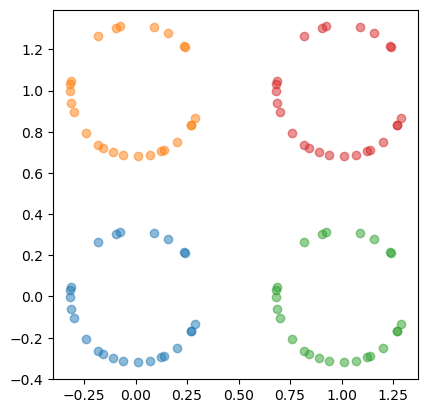

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of points and radius range
n_points = 25
min_radius = 0.4
max_radius = 0.6

# Define the centers of the circles
centers = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])

# Generate random radii and angles for each point
# radii = np.random.uniform(min_radius, max_radius, size=n_points)
angles = np.random.uniform(0, 2*np.pi, size=n_points)

# Generate the x and y coordinates for each point

x = (np.random.uniform(0, 1) / 20 + 0.3) * np.cos(angles)[:, np.newaxis] + centers[:, 0]
y = (np.random.uniform(0, 1) / 20 + 0.3) * np.sin(angles)[:, np.newaxis] + centers[:, 1]

# Plot the circles
fig, ax = plt.subplots()
for i in range(len(centers)):
    ax.scatter(x[:, i], y[:, i], alpha=0.5)
ax.set_aspect('equal')
plt.show()

data = np.empty((0,2))
for i in range(len(centers)):
    data = np.append(data, np.column_stack((x[:, i], y[:, i])), axis=0)


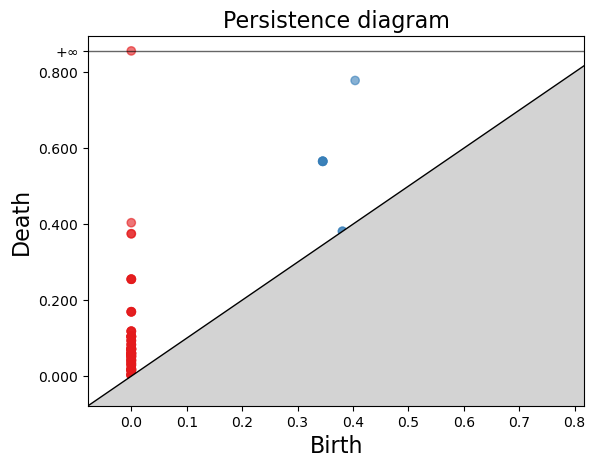

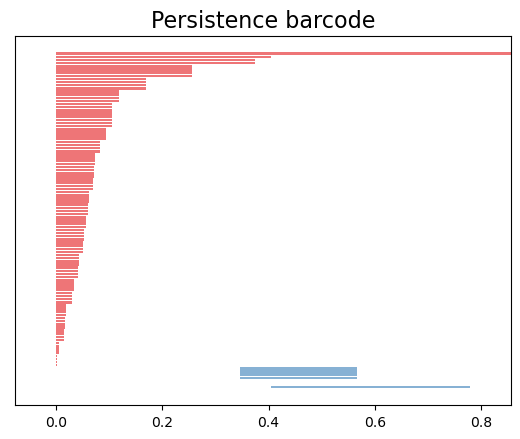

In [13]:
rips_complex = gd.RipsComplex(points=data, max_edge_length=2)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
persistence = simplex_tree.persistence()

gd.plot_persistence_diagram(persistence=persistence)
gd.plot_persistence_barcode(persistence=persistence)

In [18]:
rips_complex = gd.RipsComplex(points=data, max_edge_length=2)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
persistence = simplex_tree.persistence()

# gd.plot_persistence_diagram(persistence=persistence)
pairs = simplex_tree.persistence_pairs()
filtration = simplex_tree.get_filtration()


In [19]:
def merge_sublists_with_shared_items(data):
    merged = True
    while merged:
        merged = False
        for i in range(len(data)):
            for j in range(i + 1, len(data)):
                if set(data[i]).intersection(data[j]):
                    data[i] = list(set(data[i]).union(data[j]))
                    del data[j]
                    merged = True
                    break
            if merged:
                break
    return data

count = 0
for birth_value, death_value in [i[1] for i in persistence if i[0] >= 1]:
    filtration = simplex_tree.get_filtration()
    tolerance = 1e-6
    birth_simplices = []
    death_simplices = []

    for simplex, filtration_value in filtration:
        # print(filtration_value, birth_value)
        if abs(filtration_value - birth_value) < tolerance:
            # print(simplex)
            birth_simplices.append(simplex)
        elif abs(filtration_value - death_value) < tolerance or (death_value == np.Inf):
            death_simplices.append(simplex)
    # print(birth_simplices)

    # involved_points = set()

    # for birth_simplex in birth_simplices:
    #     for death_simplex in death_simplices:
    #         if set(birth_simplex).issubset(death_simplex):
    #             involved_points.update(birth_simplex)
    #             involved_points.update(death_simplex)
    
    involved_points_b = (merge_sublists_with_shared_items(birth_simplices))
    involved_points_d = (merge_sublists_with_shared_items(death_simplices))

    if len(involved_points_b) >= 0 : print('b',count, birth_value, death_value, involved_points_b) 
    if len(involved_points_d) >= 0 : print('d',count, birth_value, death_value, involved_points_d) 
    count += 1
    
        

b 0 0.5756159306322395 0.59162251970428 [[0, 2, 3, 20, 10, 12, 15], [35, 37, 40, 25, 27, 28, 45], [65, 50, 52, 53, 70, 60, 62], [85, 87, 90, 75, 77, 78, 95]]
d 0 0.5756159306322395 0.59162251970428 [[0, 2, 3, 4, 5, 7, 8, 11, 13, 14, 15, 16, 17, 19, 22, 23, 24], [25, 27, 28, 29, 30, 32, 33, 36, 38, 39, 40, 41, 42, 44, 47, 48, 49], [64, 65, 66, 67, 69, 72, 73, 74, 50, 52, 53, 54, 55, 57, 58, 61, 63], [75, 77, 78, 79, 80, 82, 83, 86, 88, 89, 90, 91, 92, 94, 97, 98, 99]]
b 1 0.5756159306322395 0.59162251970428 [[0, 2, 3, 20, 10, 12, 15], [35, 37, 40, 25, 27, 28, 45], [65, 50, 52, 53, 70, 60, 62], [85, 87, 90, 75, 77, 78, 95]]
d 1 0.5756159306322395 0.59162251970428 [[0, 2, 3, 4, 5, 7, 8, 11, 13, 14, 15, 16, 17, 19, 22, 23, 24], [25, 27, 28, 29, 30, 32, 33, 36, 38, 39, 40, 41, 42, 44, 47, 48, 49], [64, 65, 66, 67, 69, 72, 73, 74, 50, 52, 53, 54, 55, 57, 58, 61, 63], [75, 77, 78, 79, 80, 82, 83, 86, 88, 89, 90, 91, 92, 94, 97, 98, 99]]
b 2 0.5756159306322395 0.5916225197042799 [[0, 2, 3, 20,

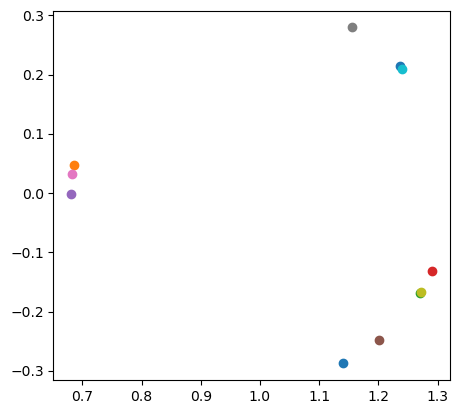

In [22]:
concern_points = list({70, 71, 73, 50, 51, 55, 56, 60, 61, 62, 63})
fig, ax = plt.subplots()
# for i in range(len(centers)):
#     ax.scatter(x[:, i], y[:, i])
for idx, p in enumerate([data[i] for i in concern_points]):
    ax.scatter(p[0], p[1])
ax.set_aspect('equal')
plt.show()